In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


In [16]:

# Load analyzed data
play_news = pd.read_csv('PlayNews_Analyzed.csv')
noname_news = pd.read_csv('NoNameNews_Analyzed.csv')
top_geo_counts = pd.read_csv('TopGeolocations.csv', names=['Geolocation', 'Count'])


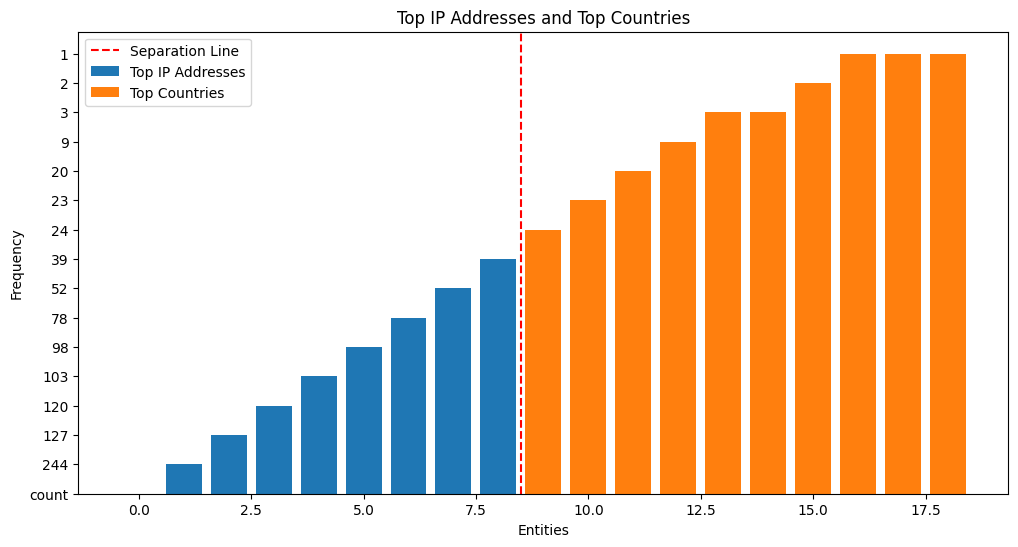

In [17]:

# 1. Top IP Addresses and Countries
fig, ax = plt.subplots(figsize=(12, 6))
geo_split = len(top_geo_counts) // 2
ax.bar(range(geo_split), top_geo_counts['Count'][:geo_split], label='Top IP Addresses')
ax.bar(range(geo_split, len(top_geo_counts)), top_geo_counts['Count'][geo_split:], label='Top Countries')
ax.axvline(x=geo_split - 0.5, color='red', linestyle='--', label='Separation Line')
ax.set_title('Top IP Addresses and Top Countries')
ax.set_xlabel('Entities')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()



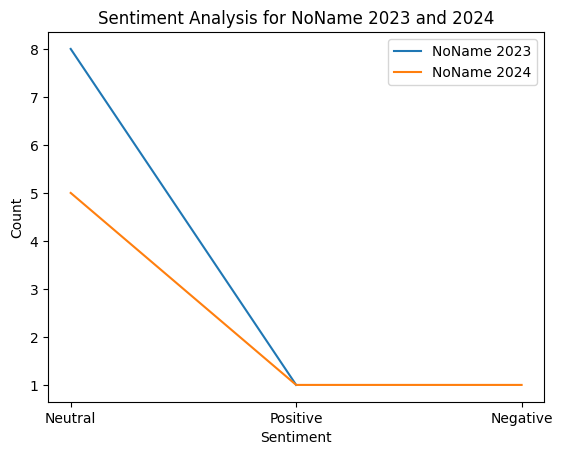

In [18]:
# 2. Sentiment Analysis for NoName 2023 and 2024
noname_news['Year'] = pd.to_datetime(noname_news['Data']).dt.year
for year in [2023, 2024]:
    year_data = noname_news[noname_news['Year'] == year]
    sentiment_counts = year_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts()
    plt.plot(sentiment_counts.index, sentiment_counts.values, label=f'NoName {year}')
plt.title('Sentiment Analysis for NoName 2023 and 2024')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.show()


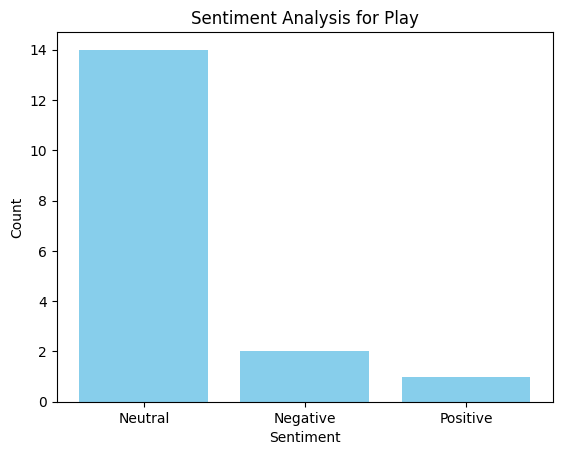

In [19]:

# 3. Sentiment Analysis for Play
sentiment_counts_play = play_news['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts()
plt.bar(sentiment_counts_play.index, sentiment_counts_play.values, color='skyblue')
plt.title('Sentiment Analysis for Play')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [26]:
# 4. Timeline Analysis for NoName 2023 and 2024
for year in [2023, 2024]:
    year_data = noname_news[noname_news['Year'] == year]
    timeline_counts = year_data['Data'].dt.date.value_counts().sort_index()
    plt.bar(timeline_counts.index, timeline_counts.values, label=f'NoName {year}')
    plt.title(f'Timeline Analysis for NoName {year}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

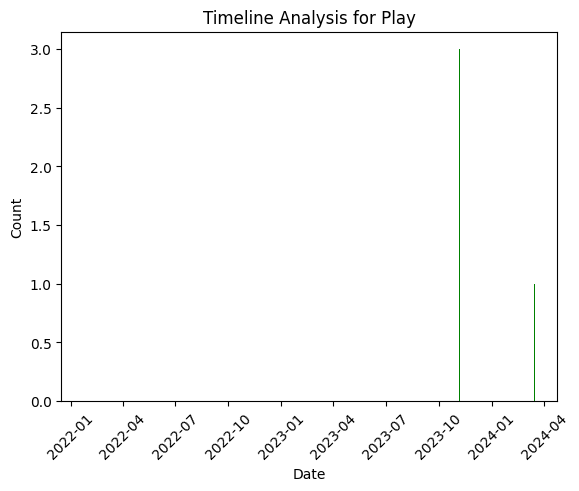

In [21]:
# 5. Timeline Analysis for Play
play_news['Data'] = pd.to_datetime(play_news['Data'])
timeline_counts_play = play_news['Data'].dt.date.value_counts().sort_index()
plt.bar(timeline_counts_play.index, timeline_counts_play.values, color='green')
plt.title('Timeline Analysis for Play')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

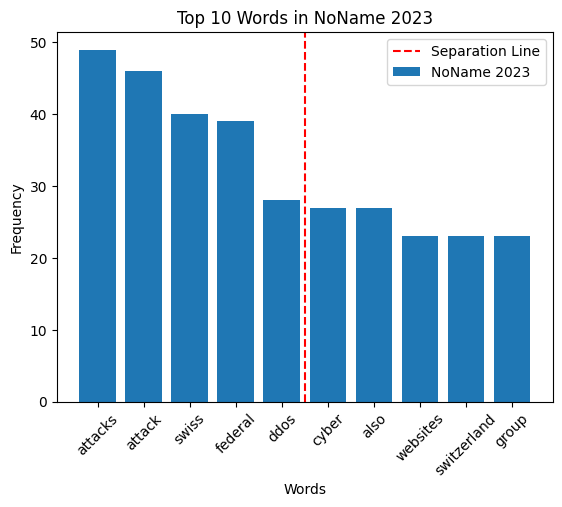

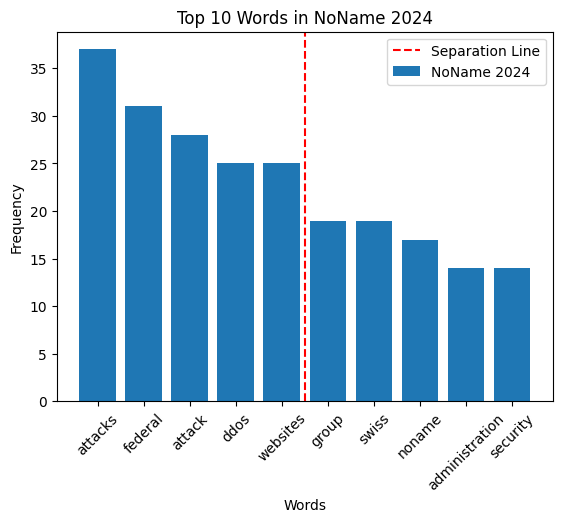

In [22]:
# 6. Top 10 Words in NoName 2023 and 2024
for year in [2023, 2024]:
    year_data = noname_news[noname_news['Year'] == year]
    word_counts = Counter(' '.join(year_data['Cleaned_Content']).split()).most_common(10)
    words, counts = zip(*word_counts)
    plt.bar(range(10), counts, label=f'NoName {year}')
    plt.axvline(x=4.5, color='red', linestyle='--', label='Separation Line')
    plt.xticks(range(10), words, rotation=45)
    plt.title(f'Top 10 Words in NoName {year}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

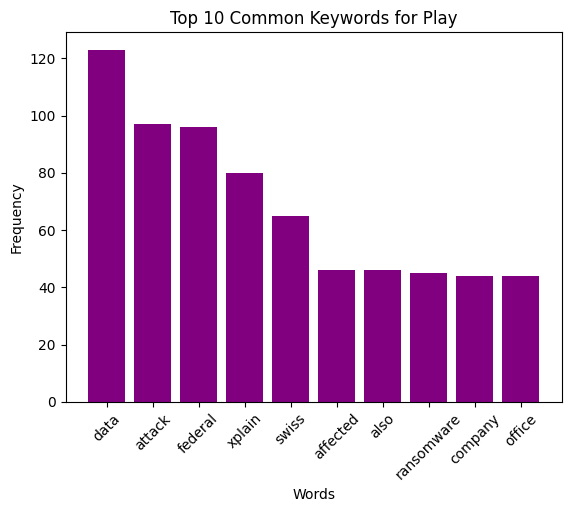

In [23]:
# 7. Top 10 Common Keywords for Play
word_counts_play = Counter(' '.join(play_news['Cleaned_Content']).split()).most_common(10)
words_play, counts_play = zip(*word_counts_play)
plt.bar(range(10), counts_play, color='purple')
plt.xticks(range(10), words_play, rotation=45)
plt.title('Top 10 Common Keywords for Play')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
